In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("MinMax_Scaler_result.csv",encoding="cp949")

In [3]:
data.head()

,CUSTNO,GNO,CBSCORE,CBSCOREGRD,CREDITOTAMT,YSALEAMT,ESTMM,ASSETAMT,IMSAAMT,IMJUAMT,...,KIND_JOB_K,KIND_JOB_L,KIND_JOB_M,KIND_JOB_N,KIND_JOB_O,KIND_JOB_P,KIND_JOB_Q,KIND_JOB_R,KIND_JOB_S,KIND_JOB_T
0,475821,l180202101898,0.949290,0.000000,0.002338,0.223956,0.058085,0.000768,0.004153,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,74417,l230201700120,0.897566,0.166667,0.002221,0.129121,0.014129,0.001920,0.000000,0.015489,...,0,0,0,0,0,0,0,0,0,0
2,387787,l110201603233,0.909736,0.000000,0.000000,0.083846,0.290424,0.000768,0.004153,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,395418,l230201700254,0.884381,0.166667,0.001637,0.079560,0.017268,0.000768,0.004153,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,190372,l200201601418,0.726166,0.833333,0.000818,0.036813,0.262166,0.006143,0.000831,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.columns

Index(['CUSTNO', 'GNO', 'CBSCORE', 'CBSCOREGRD', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'BIZNML_x', 'LABORCNT', 'ACTCD', 'KOSPI', '환율',
       'GDP', '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률', '소비자심리지수',
       'KIND_JOB', 'KIND_JOB_A', 'KIND_JOB_B', 'KIND_JOB_C', 'KIND_JOB_D',
       'KIND_JOB_E', 'KIND_JOB_F', 'KIND_JOB_G', 'KIND_JOB_H', 'KIND_JOB_I',
       'KIND_JOB_J', 'KIND_JOB_K', 'KIND_JOB_L', 'KIND_JOB_M', 'KIND_JOB_N',
       'KIND_JOB_O', 'KIND_JOB_P', 'KIND_JOB_Q', 'KIND_JOB_R', 'KIND_JOB_S',
       'KIND_JOB_T'],
      dtype='object')

In [5]:
features = data[['CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM',  'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'LABORCNT', 'KOSPI', '환율', 'GDP', 
        '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수','KIND_JOB_A', 'KIND_JOB_B', 'KIND_JOB_C', 'KIND_JOB_D',
       'KIND_JOB_E', 'KIND_JOB_F', 'KIND_JOB_G', 'KIND_JOB_H', 'KIND_JOB_I',
       'KIND_JOB_J', 'KIND_JOB_K', 'KIND_JOB_L', 'KIND_JOB_M', 'KIND_JOB_N',
       'KIND_JOB_O', 'KIND_JOB_P', 'KIND_JOB_Q', 'KIND_JOB_R', 'KIND_JOB_S',
       'KIND_JOB_T']]
act = data['ACTCD']

#BorderlineSMOTE 기법 활용

In [6]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split

In [7]:

train_x, test_x,train_y, test_y = train_test_split(features, act,
stratify=act,train_size=0.7,test_size=0.3,random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(27381, 41) (11736, 41) (27381,) (11736,)


In [8]:
sm = BorderlineSMOTE(random_state=42)
over_train_x, over_train_y = sm.fit_resample(train_x,train_y)
'''
over_train_x : 학습용 독립변수
over_train_y : 학습용 종속변수
'''

'\nover_train_x : 학습용 독립변수\nover_train_y : 학습용 종속변수\n'

In [9]:
from sklearn.neighbors import KNeighborsClassifier

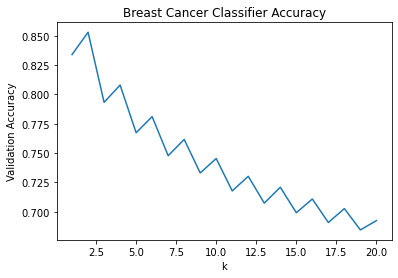

0.8530163599182005


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_BOST = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    matrix_kd_tree_uniform_BOST.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()    
print(max(accuracies))

In [11]:
matrix_kd_tree_uniform_BOST

[(1,
  0.24682814302191464,
  0.4,
  0.30527817403708984,
  0.6387774235889743,
  0.8340149965916837,
  array([[9360, 1306],
         [ 642,  428]], dtype=int64)),
 (2,
  0.262164124909223,
  0.33738317757009345,
  0.295055169595423,
  0.6210636120365,
  0.8530163599182005,
  array([[9650, 1016],
         [ 709,  361]], dtype=int64)),
 (3,
  0.20418848167539266,
  0.4373831775700935,
  0.2784057108863772,
  0.6331862447010416,
  0.7932856169052488,
  array([[8842, 1824],
         [ 602,  468]], dtype=int64)),
 (4,
  0.21047479197258934,
  0.40186915887850466,
  0.27626084163186637,
  0.6253204785579471,
  0.8080265848670757,
  array([[9053, 1613],
         [ 640,  430]], dtype=int64)),
 (5,
  0.1937269372693727,
  0.49065420560747663,
  0.2777777777777778,
  0.6428988260364404,
  0.7673824130879345,
  array([[8481, 2185],
         [ 545,  525]], dtype=int64)),
 (6,
  0.20127540852929454,
  0.4719626168224299,
  0.28220173232746576,
  0.6420379369504987,
  0.7811008861622358,
  array([[

In [12]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.88      0.91     10666
        정상보증       0.25      0.40      0.31      1070

    accuracy                           0.83     11736
   macro avg       0.59      0.64      0.61     11736
weighted avg       0.87      0.83      0.85     11736



# Edited Nearest Neighbours

In [13]:
from imblearn.under_sampling import EditedNearestNeighbours

In [14]:
enn = EditedNearestNeighbours()
over_train_x,over_train_y = enn.fit_resample(train_x,train_y)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

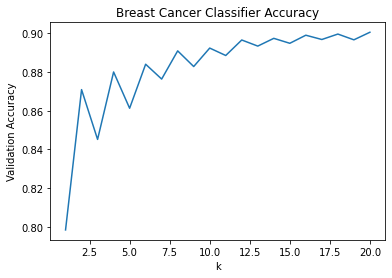

0.9005623721881391


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_ENN = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_ENN.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()    
print(max(accuracies))

In [17]:
matrix_kd_tree_uniform_ENN

[(1,
  0.2145374449339207,
  0.45514018691588787,
  0.2916167664670659,
  0.6439867444986339,
  0.7983980913428766,
  array([[8883, 1783],
         [ 583,  487]], dtype=int64)),
 (2,
  0.2781655034895314,
  0.2607476635514019,
  0.2691751085383502,
  0.5964342105493743,
  0.8709100204498977,
  array([[9942,  724],
         [ 791,  279]], dtype=int64)),
 (3,
  0.24008350730688935,
  0.32242990654205606,
  0.27522935779816515,
  0.6100242538523144,
  0.8451772324471711,
  array([[9574, 1092],
         [ 725,  345]], dtype=int64)),
 (4,
  0.2963855421686747,
  0.22990654205607478,
  0.25894736842105265,
  0.5875765599835971,
  0.880027266530334,
  array([[10082,   584],
         [  824,   246]], dtype=int64)),
 (5,
  0.2522202486678508,
  0.26542056074766357,
  0.2586520947176685,
  0.5932390634227724,
  0.8612815269256987,
  array([[9824,  842],
         [ 786,  284]], dtype=int64)),
 (6,
  0.2894356005788712,
  0.18691588785046728,
  0.22714366837024416,
  0.5704408803587607,
  0.884032

In [18]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.83      0.88     10666
        정상보증       0.21      0.45      0.29      1070

    accuracy                           0.80     11736
   macro avg       0.58      0.64      0.59     11736
weighted avg       0.87      0.80      0.83     11736



In [19]:
from imblearn.over_sampling import ADASYN


In [20]:
ADA = ADASYN(random_state=42,)
over_train_x,over_train_y = ADA.fit_resample(train_x,train_y)
from sklearn.neighbors import KNeighborsClassifier

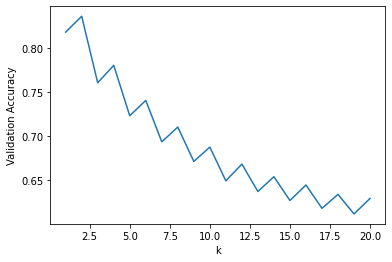

0.8357191547375596


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_ADA = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_ADA.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [22]:
matrix_kd_tree_uniform_ADA

[(1,
  0.22434244455905106,
  0.40654205607476634,
  0.28913260219341974,
  0.6327666215119753,
  0.8177402862985685,
  array([[9162, 1504],
         [ 635,  435]], dtype=int64)),
 (2,
  0.24433849821215733,
  0.38317757009345793,
  0.29839883551673946,
  0.6321475699707867,
  0.8357191547375596,
  array([[9398, 1268],
         [ 660,  410]], dtype=int64)),
 (3,
  0.18714080459770116,
  0.4869158878504673,
  0.2703684483653347,
  0.6373731886280276,
  0.7603953646898433,
  array([[8403, 2263],
         [ 549,  521]], dtype=int64)),
 (4,
  0.198,
  0.46261682242990654,
  0.27731092436974797,
  0.6373181618243663,
  0.7801635991820041,
  array([[8661, 2005],
         [ 575,  495]], dtype=int64)),
 (5,
  0.17789598108747046,
  0.5626168224299065,
  0.27031881454872025,
  0.650894010314897,
  0.7230743012951601,
  array([[7884, 2782],
         [ 468,  602]], dtype=int64)),
 (6,
  0.18434504792332268,
  0.5392523364485982,
  0.27476190476190476,
  0.6499468132646142,
  0.7404567143830948,
 

In [23]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.86      0.90     10666
        정상보증       0.22      0.40      0.29      1070

    accuracy                           0.82     11736
   macro avg       0.58      0.63      0.59     11736
weighted avg       0.87      0.82      0.84     11736



In [24]:
from imblearn.combine import SMOTEENN

SMT = SMOTEENN(random_state=42)
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

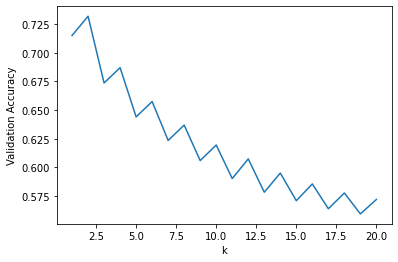

0.7317655078391274


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_SMTEN = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_SMTEN.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [26]:
matrix_kd_tree_uniform_SMTEN

[(1,
  0.17397535110346804,
  0.5672897196261683,
  0.2662864663303356,
  0.6485426659259661,
  0.7149795501022495,
  array([[7784, 2882],
         [ 463,  607]], dtype=int64)),
 (2,
  0.18148375229920294,
  0.5532710280373832,
  0.27331486611265,
  0.6514714412641445,
  0.7317655078391274,
  array([[7996, 2670],
         [ 478,  592]], dtype=int64)),
 (3,
  0.1625519432901491,
  0.6214953271028038,
  0.2577019957372602,
  0.6501438758146684,
  0.6735685071574642,
  array([[7240, 3426],
         [ 405,  665]], dtype=int64)),
 (4,
  0.16563944530046226,
  0.602803738317757,
  0.2598710717163578,
  0.6490954750092441,
  0.6869461486025903,
  array([[7417, 3249],
         [ 425,  645]], dtype=int64)),
 (5,
  0.15466666666666667,
  0.6504672897196262,
  0.24991023339317772,
  0.6469099996319864,
  0.6440013633265167,
  array([[6862, 3804],
         [ 374,  696]], dtype=int64)),
 (6,
  0.15836999305394767,
  0.6392523364485981,
  0.253850436073483,
  0.6492248931446066,
  0.6573790047716428

In [27]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.73      0.82     10666
        정상보증       0.17      0.57      0.27      1070

    accuracy                           0.71     11736
   macro avg       0.56      0.65      0.54     11736
weighted avg       0.87      0.71      0.77     11736



In [28]:
from imblearn.combine import SMOTETomek

SMT = SMOTETomek(random_state=42)
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

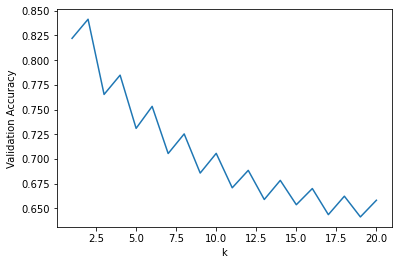

0.8414280845262441


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_SMTTK = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_SMTTK.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [30]:
matrix_kd_tree_uniform_SMTTK

[(1,
  0.23040254237288135,
  0.40654205607476634,
  0.29411764705882354,
  0.6351573959353768,
  0.8220858895705522,
  array([[9213, 1453],
         [ 635,  435]], dtype=int64)),
 (2,
  0.25358255451713396,
  0.38037383177570094,
  0.30429906542056073,
  0.6340271559028513,
  0.8414280845262441,
  array([[9468, 1198],
         [ 663,  407]], dtype=int64)),
 (3,
  0.18952802359882007,
  0.4803738317757009,
  0.27181385510312006,
  0.6371492260322345,
  0.7653374233128835,
  array([[8468, 2198],
         [ 556,  514]], dtype=int64)),
 (4,
  0.2,
  0.4532710280373832,
  0.2775393419170243,
  0.6356923300696947,
  0.7848500340831629,
  array([[8726, 1940],
         [ 585,  485]], dtype=int64)),
 (5,
  0.1788242536164974,
  0.5429906542056074,
  0.2690437601296597,
  0.6464250102079978,
  0.7309986366734833,
  array([[7998, 2668],
         [ 489,  581]], dtype=int64)),
 (6,
  0.19008825526137135,
  0.5233644859813084,
  0.27888446215139445,
  0.6498315023193623,
  0.7532379004771643,
  arr

In [31]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.86      0.90     10666
        정상보증       0.23      0.41      0.29      1070

    accuracy                           0.82     11736
   macro avg       0.58      0.64      0.60     11736
weighted avg       0.87      0.82      0.84     11736



In [32]:
from imblearn.under_sampling import TomekLinks

SMT = TomekLinks()
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

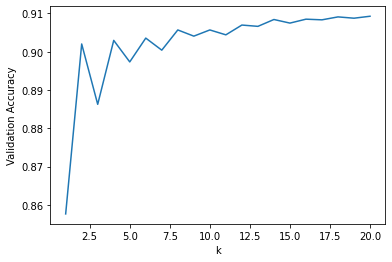

0.9092535787321063


In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_TK = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_TK.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [34]:
matrix_kd_tree_uniform_TK

[(1,
  0.27724240177909565,
  0.34953271028037386,
  0.30921868540719305,
  0.6290603735163355,
  0.8576175869120655,
  array([[9691,  975],
         [ 696,  374]], dtype=int64)),
 (2,
  0.391304347826087,
  0.13457943925233645,
  0.20027816411682892,
  0.55678906333515,
  0.9020109066121336,
  array([[10442,   224],
         [  926,   144]], dtype=int64)),
 (3,
  0.30935251798561153,
  0.20093457943925233,
  0.24362606232294617,
  0.57796588338173,
  0.8862474437627812,
  array([[10186,   480],
         [  855,   215]], dtype=int64)),
 (4,
  0.38762214983713356,
  0.11121495327102804,
  0.1728395061728395,
  0.5467944258198381,
  0.9029481935923653,
  array([[10478,   188],
         [  951,   119]], dtype=int64)),
 (5,
  0.35357917570498915,
  0.15233644859813084,
  0.21293272370999344,
  0.5621986011976216,
  0.8973244717109747,
  array([[10368,   298],
         [  907,   163]], dtype=int64)),
 (6,
  0.3368421052631579,
  0.059813084112149535,
  0.1015873015873016,
  0.52399992289237

In [35]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.93      0.91      0.92     10666
        정상보증       0.27      0.34      0.30      1070

    accuracy                           0.86     11736
   macro avg       0.60      0.62      0.61     11736
weighted avg       0.87      0.86      0.86     11736



In [36]:
sorted(matrix_kd_tree_uniform_BOST,key=lambda x: x[3])

[(20,
  0.16424226395133562,
  0.5803738317757009,
  0.2560296846011132,
  0.642052657496701,
  0.6924846625766872,
  array([[7506, 3160],
         [ 449,  621]], dtype=int64)),
 (19,
  0.1632548618219038,
  0.5962616822429907,
  0.25632784250703095,
  0.6448400104445781,
  0.684560327198364,
  array([[7396, 3270],
         [ 432,  638]], dtype=int64)),
 (17,
  0.16518324607329843,
  0.5897196261682243,
  0.25807770961145193,
  0.6453660947267148,
  0.690865712338105,
  array([[7477, 3189],
         [ 439,  631]], dtype=int64)),
 (18,
  0.16890227210511907,
  0.5766355140186916,
  0.26127461359305526,
  0.6459963619221529,
  0.7027096114519428,
  array([[7630, 3036],
         [ 453,  617]], dtype=int64)),
 (15,
  0.16846361185983827,
  0.5841121495327103,
  0.2615062761506276,
  0.647437661115502,
  0.6992160872528971,
  array([[7581, 3085],
         [ 445,  625]], dtype=int64)),
 (16,
  0.17086993482572968,
  0.5635514018691589,
  0.2622309197651664,
  0.6446108781331543,
  0.71088957

In [37]:
sorted(matrix_kd_tree_uniform_ENN,key=lambda x: x[3])

[(20,
  0.30677290836653387,
  0.07196261682242991,
  0.1165783497350492,
  0.5278245486137276,
  0.9005623721881391,
  array([[10492,   174],
         [  993,    77]], dtype=int64)),
 (18,
  0.3,
  0.07570093457943926,
  0.12089552238805971,
  0.5289905385441731,
  0.8996250852079073,
  array([[10477,   189],
         [  989,    81]], dtype=int64)),
 (19,
  0.2826747720364742,
  0.08691588785046729,
  0.13295210864903503,
  0.5323947524757681,
  0.8966428084526245,
  array([[10430,   236],
         [  977,    93]], dtype=int64)),
 (16,
  0.3063973063973064,
  0.08504672897196262,
  0.13313825896122897,
  0.5328665109326342,
  0.8990286298568507,
  array([[10460,   206],
         [  979,    91]], dtype=int64)),
 (14,
  0.3005952380952381,
  0.09439252336448598,
  0.14366998577524895,
  0.536179948162648,
  0.8974096796182686,
  array([[10431,   235],
         [  969,   101]], dtype=int64)),
 (17,
  0.30684931506849317,
  0.10467289719626169,
  0.15609756097560976,
  0.5404763323408648,

In [38]:
sorted(matrix_kd_tree_uniform_ADA,key=lambda x: x[3])

[(19,
  0.14977885002010455,
  0.6962616822429907,
  0.24652547981469225,
  0.6498840756986565,
  0.6119631901840491,
  array([[6437, 4229],
         [ 325,  745]], dtype=int64)),
 (18,
  0.15213638325420803,
  0.6588785046728972,
  0.24719495091164095,
  0.6452558658747948,
  0.6341172460804363,
  array([[6737, 3929],
         [ 365,  705]], dtype=int64)),
 (20,
  0.15186915887850466,
  0.6682242990654206,
  0.24749048113534097,
  0.6469285755593368,
  0.6295160190865713,
  array([[6673, 3993],
         [ 355,  715]], dtype=int64)),
 (17,
  0.15090090090090091,
  0.688785046728972,
  0.247564662411824,
  0.6499897481910377,
  0.6182685753237901,
  array([[6519, 4147],
         [ 333,  737]], dtype=int64)),
 (15,
  0.1527310924369748,
  0.6794392523364486,
  0.24939965694682678,
  0.6506609350000262,
  0.6271301976823449,
  array([[6633, 4033],
         [ 343,  727]], dtype=int64)),
 (16,
  0.1552491103202847,
  0.6523364485981309,
  0.25080848005749196,
  0.6481258466504625,
  0.64468

In [39]:
sorted(matrix_kd_tree_uniform_SMTEN,key=lambda x: x[3])

[(19,
  0.13855103120042306,
  0.7345794392523365,
  0.23313065401156755,
  0.6381972763484633,
  0.5593899113837764,
  array([[5779, 4887],
         [ 284,  786]], dtype=int64)),
 (17,
  0.13882940756602427,
  0.7271028037383177,
  0.23314354210368593,
  0.6373185123135616,
  0.5639059304703476,
  array([[5840, 4826],
         [ 292,  778]], dtype=int64)),
 (15,
  0.13997821350762527,
  0.7205607476635514,
  0.23441775615688656,
  0.6382196200346634,
  0.570892978868439,
  array([[5929, 4737],
         [ 299,  771]], dtype=int64)),
 (20,
  0.14057101291143845,
  0.7224299065420561,
  0.23534784594306593,
  0.6396698567024925,
  0.5720006816632583,
  array([[5940, 4726],
         [ 297,  773]], dtype=int64)),
 (13,
  0.1415634817963408,
  0.7158878504672898,
  0.2363832741860824,
  0.6401959409846294,
  0.5783060668029993,
  array([[6021, 4645],
         [ 304,  766]], dtype=int64)),
 (18,
  0.14161903005716392,
  0.7177570093457943,
  0.23656245187124594,
  0.6406617411251754,
  0.577

In [40]:
sorted(matrix_kd_tree_uniform_SMTTK,key=lambda x: x[3])

[(17,
  0.15422222222222223,
  0.6485981308411215,
  0.24919210053859964,
  0.6458816643329928,
  0.6436605316973415,
  array([[6860, 3806],
         [ 376,  694]], dtype=int64)),
 (19,
  0.1558868669151502,
  0.6644859813084112,
  0.25253063399041026,
  0.6517629606523304,
  0.641359918200409,
  array([[6816, 3850],
         [ 359,  711]], dtype=int64)),
 (15,
  0.15790676416819013,
  0.6457943925233645,
  0.25376423062798387,
  0.6501520246884589,
  0.6537150647580096,
  array([[6981, 3685],
         [ 379,  691]], dtype=int64)),
 (18,
  0.1590855526749941,
  0.6308411214953271,
  0.2540937323546019,
  0.6481601069693024,
  0.662321063394683,
  array([[7098, 3568],
         [ 395,  675]], dtype=int64)),
 (20,
  0.15873752610814573,
  0.6392523364485981,
  0.2543223647518126,
  0.6496936724433127,
  0.6582310838445807,
  array([[7041, 3625],
         [ 386,  684]], dtype=int64)),
 (16,
  0.1604459524963645,
  0.6186915887850467,
  0.2548113933795227,
  0.6469606453207063,
  0.67007498